In [1]:
# Shor's algorithm
# This is an algorithm created by Peter Shor, to use quantum computing to rapidly factorize large numbers.
# The below code demonstrates the underlying principles of Shor's algorithm, to the best ability of classic Python.


In [2]:
# We import numpy for math, random, and matplotlib for drawing our quantum circuit.
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# We find the greatest common divisor using the Euclidean algorithm
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

# We now check if the number is prime.
def is_prime(n):
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

In [4]:
# Trial division for finding factors of the number
def trial_division(n):
    factors = []
    while n % 2 == 0:
        factors.append(2)
        n //= 2
    while n % 3 == 0:
        factors.append(3)
        n //= 3
    i = 5
    while i * i <= n:
        while n % i == 0:
            factors.append(i)
            n //= i
        while n % (i + 2) == 0:
            factors.append(i + 2)
            n //= i + 2
        i += 6
    if n > 1:
        factors.append(n)
    return factors

In [5]:
# Quantum Fourier Transform matrix. This matrix is the most important part of the algorithm and utilises complex math.
def qft_matrix(n):
    size = 2 ** n
    qft = np.zeros((size, size), dtype=complex)
    for j in range(size):
        for k in range(size):
            qft[j, k] = np.exp(2j * np.pi * j * k / size) / np.sqrt(size)
    return qft


# Modular exponentiation matrix - a way in which any number can be expressed in a range of its period of modular exponents.
def mod_exp_matrix(a, N, n):
    size = 2 ** n
    mod_exp = np.zeros((size, size), dtype=complex)
    for x in range(size):
        y = pow(a, x, N)
        mod_exp[x, y] = 1
    return mod_exp

In [6]:
# Shor's algorithm implementation
# Note this algorithm is not designed to be on classical hardware.
def shors_algorithm(a, N):
    n = int(np.ceil(np.log2(N)))
    qft = qft_matrix(n)
    mod_exp = mod_exp_matrix(a, N, n)

    state = np.zeros((2 ** n, 1), dtype=complex)
    state[0] = 1

    H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
    Hn = H
    for _ in range(n - 1):
        Hn = np.kron(Hn, H)
    state = Hn @ state

    state = mod_exp @ state

    state = qft @ state

    probabilities = np.abs(state) ** 2
    result = np.argmax(probabilities)

    return result



In [7]:
# Finding a factor of N using Shor's algorithm - albeit this is not a qubit-system, we aim to represent the benefit
# of quantum hardware classically
def quantum_factor(N):
    a = random.randint(2, N - 1)
    while gcd(a, N) != 1:
        a = random.randint(2, N - 1)
    result = shors_algorithm(a, N)
    factor = gcd(result, N)
    if factor == 1 or factor == N:
        return quantum_factor(N)
    return factor


# N into its prime factors
def prime_factors(N):
    factors = trial_division(N)
    prime_factors_list = []
    for factor in factors:
        while not is_prime(factor):
            smaller_factor = quantum_factor(factor)
            prime_factors_list.append(smaller_factor)
            factor //= smaller_factor
        prime_factors_list.append(factor)
    return prime_factors_list

***** CLASSIC REPRESENTATION OF QUANTUM FACTORISATION *****
Enter a number to factorize: 15
The factors of 15 are: [3, 5]


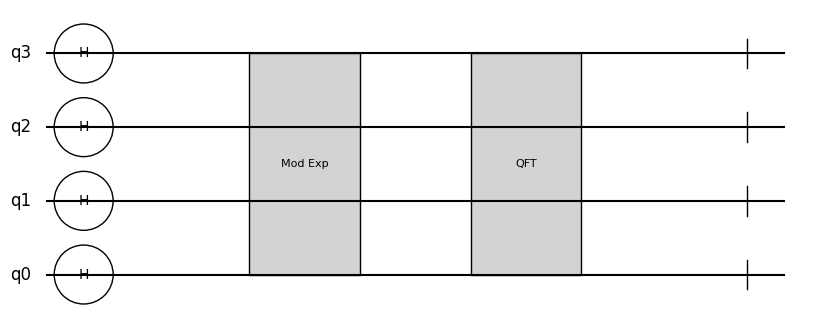

In [19]:
def draw_shors_circuit(number_to_factorize):
    num_qubits = int(np.ceil(np.log2(number_to_factorize)))  # Calculate number of qubits
    fig, ax = plt.subplots(figsize=(12, num_qubits))

    def draw_qubit_line(y, label):
        ax.plot([-0.5, 9.5], [y, y], color='black')
        ax.text(-1, y, label, fontsize=12, va='center')

    def draw_hadamard(x, y):
        radius = 0.4
        circle = patches.Circle((x, y), radius, facecolor='white', edgecolor='black', linewidth=1)
        ax.add_patch(circle)
        ax.text(x, y, 'H', ha='center', va='center', fontsize=10)

    def draw_operation_box(x, y_min, y_max, label):
        width = 1.5
        height = y_max - y_min
        rect = patches.Rectangle((x - width / 2, y_min), width, height, facecolor='lightgray', edgecolor='black', linewidth=1)
        ax.add_patch(rect)
        ax.text(x, y_min + height / 2, label, ha='center', va='center', fontsize=8, wrap=True)

    # Draw qubit lines
    for i in range(num_qubits):
        draw_qubit_line(i, f"q{i}")

    # Draw initial Hadamard gates
    for i in range(num_qubits):
        draw_hadamard(0, i)

    # Draw modular exponentiation operation
    draw_operation_box(3, 0, num_qubits - 1, "Mod Exp")

    # Draw Quantum Fourier Transform operation
    draw_operation_box(6, 0, num_qubits - 1, "QFT")

    # Draw measurement symbol (simplified)
    for i in range(num_qubits):
        ax.plot([9, 9], [i - 0.2, i + 0.2], color='black', linewidth=1)

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

print("***** CLASSIC REPRESENTATION OF QUANTUM FACTORISATION *****")
number = int(input("Enter a number to factorize: "))
factors = prime_factors(number)
print(f"The factors of {number} are: {factors}")
draw_shors_circuit(number)